Video FPS: 29.743095371330988, Total Frames: 639, Duration: 21.483977777777778s
Estimated Heart Rate: 79.82 BPM


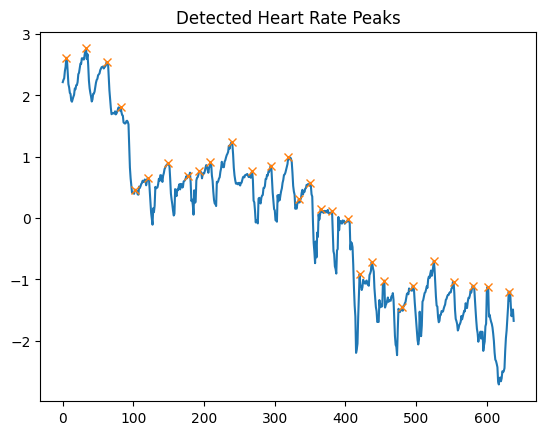

Estimated SpO2: 85.00%


In [1]:
# Import necessary libraries
import cv2
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Function to process video and analyze the fingertip pulse
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error opening video file")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps
    
    print(f"Video FPS: {fps}, Total Frames: {frame_count}, Duration: {duration}s")

    brightness_values = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale (or focus on the red channel for PPG analysis)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Crop the region of interest (center of the frame where the finger is likely placed)
        roi = gray_frame[100:400, 100:400]

        # Calculate the average brightness in the region of interest
        avg_brightness = np.mean(roi)
        brightness_values.append(avg_brightness)

    cap.release()
    
    return np.array(brightness_values), fps

# Function to detect heart rate from brightness values
def detect_heart_rate(brightness_values, fps):
    # Detrending the signal (optional, depends on the signal)
    detrended = brightness_values - np.mean(brightness_values)

    # Find peaks in the brightness values (each peak corresponds to a heartbeat)
    peaks, _ = find_peaks(detrended, distance=fps * 0.5)  # assuming heart rate is > 30 BPM
    
    # Calculate heart rate
    peak_intervals = np.diff(peaks) / fps
    avg_heartbeat_interval = np.mean(peak_intervals)
    heart_rate = 60 / avg_heartbeat_interval
    
    return heart_rate, detrended, peaks

# Function to estimate SpO2 (using a simplified approach)
# NOTE: This requires two different color channels (red and infrared or similar).
def estimate_spo2(brightness_values_red, brightness_values_ir):
    # For real-world SpO2 estimation, you need red and infrared channel analysis.
    # This is a placeholder for a simplified algorithm.
    r_ratio = np.mean(brightness_values_red) / np.mean(brightness_values_ir)
    
    # Using a basic linear model (example coefficients, adjust with calibration)
    spo2 = 110 - 25 * r_ratio
    
    return spo2

# Main function
def main(video_path):
    brightness_values, fps = process_video(video_path)
    
    # Estimate heart rate
    heart_rate, detrended_signal, peaks = detect_heart_rate(brightness_values, fps)
    print(f"Estimated Heart Rate: {heart_rate:.2f} BPM")

    # Plot the signal and detected peaks
    plt.plot(detrended_signal)
    plt.plot(peaks, detrended_signal[peaks], "x")
    plt.title("Detected Heart Rate Peaks")
    plt.show()

    # Placeholder: Generate synthetic IR signal (or use different color channels from the video)
    brightness_values_ir = brightness_values  # Replace with IR data if available

    # Estimate SpO2
    spo2 = estimate_spo2(brightness_values, brightness_values_ir)
    print(f"Estimated SpO2: {spo2:.2f}%")

# Run the program
video_path = '/home/dipendu/programs/mtech_2023/sem-3/ssiot/video_20240917_014916.mp4'  # Replace with the path to your video
main(video_path)


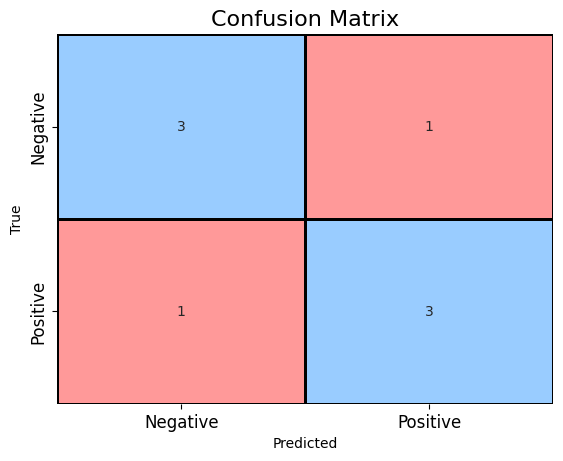

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample data
y_true = [0, 0, 1, 1, 0, 1, 1, 0]
y_pred = [0, 1, 1, 1, 0, 0, 1, 0]

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a figure and axis
fig, ax = plt.subplots()

# Define colors for each zone
colors = ['#FF9999', '#FFCC99', '#99FF99', '#99CCFF']

# Create a heatmap with specified colors
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette(colors), 
            linewidths=1, linecolor='black', cbar=False, ax=ax)

# Set the labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticklabels(['Negative', 'Positive'], color='black', fontsize=12)
ax.set_yticklabels(['Negative', 'Positive'], color='black', fontsize=12)

# Set title
plt.title('Confusion Matrix', fontsize=16)

# Show the plot
plt.show()


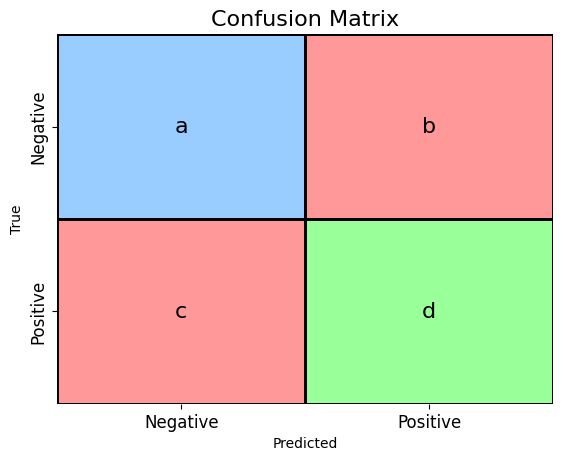

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample inputs
x_true = 50  # True Negatives
y_true = 10  # False Positives
x_pred = 5   # False Negatives
y_pred = 35  # True Positives

# Create a confusion matrix from the inputs
cm = np.array([[x_true, y_true], [x_pred, y_pred]])

# Create a figure and axis
fig, ax = plt.subplots()

# Define colors for each zone
colors = ['#FF9999', '#FFCC99', '#99FF99', '#99CCFF']

# Create a heatmap with specified colors
sns.heatmap(cm, annot=False, cmap=sns.color_palette(colors), 
            linewidths=1, linecolor='black', cbar=False, ax=ax)

# Add labels to the zones
zone_labels = np.array([['a', 'b'], ['c', 'd']])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j + 0.5, i + 0.5, zone_labels[i, j],
                ha='center', va='center', color='black', fontsize=16)

# Set the labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticklabels(['Negative', 'Positive'], color='black', fontsize=12)
ax.set_yticklabels(['Negative', 'Positive'], color='black', fontsize=12)

# Set title
plt.title('Confusion Matrix', fontsize=16)

# Show the plot
plt.show()


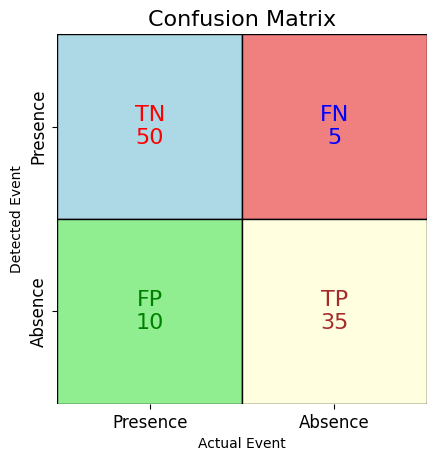

In [3]:
import matplotlib.pyplot as plt

def plot_confusion_matrix_with_colored_counts(TP, TN, FP, FN):
    # Create a figure with specified size
    # fig, axs = plt.subplots(2, 2, figsize=(6, 6))

    # Define zone colors and text colors
    zone_colors = {
        "TN": "lightblue",
        "FN": "lightcoral",
        "FP": "lightgreen",
        "TP": "lightyellow"
    }

    text_colors = {
        "TN": "red",
        "FN": "blue",
        "FP": "green",
        "TP": "brown"
    }

    # Create a confusion matrix from the inputs
    cm = np.array([[TP, TN], [FP, FN]])
    title = np.array([['TN', 'FN'], ['FP', 'TP']])

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a heatmap with each cell having its specified color
    sns.heatmap(cm, annot=False, 
                linewidths=1, linecolor='black', cbar=False, ax=ax,
                square=True)

    # Manually set the colors for each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=zone_colors[title[i, j]], ec='black'))


    # Add labels to the zones
    zone_labels = np.array([[TN, FN], [FP, TP]])


    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j + 0.5, i + 0.5, title[i, j] + "\n" + str(zone_labels[i, j]),
                    ha='center', va='center', color=text_colors[title[i, j]], fontsize=16)

    

    # Set the labels
    ax.set_xlabel('Actual Event')
    ax.set_ylabel('Detected Event')
    ax.set_xticklabels(['Presence', 'Absence'], color='black', fontsize=12)
    ax.set_yticklabels(['Presence', 'Absence'], color='black', fontsize=12)

    # Set title
    plt.title('Confusion Matrix', fontsize=16)

    # Show the plot
    plt.show()

    # # Function to display the count in the center of the plot with specific color
    # def display_count(ax, count, title, zone_color, text_color):
    #     ax.set_facecolor(zone_color)  # Set background color for the zone
    #     ax.set_title(title, color=text_color)
    #     ax.axis('off')  # Hide axis
    #     ax.text(0.5, 0.5, str(count), fontsize=16, ha='center', va='center', color=text_color)

    #     # Draw a black border around the zone
    #     for spine in ax.spines.values():
    #         spine.set_edgecolor('black')
    #         spine.set_linewidth(2)  # Set line width for better visibility

    # # Plot True Negatives (TN)
    # display_count(axs[0, 0], TN, "a (TN)", zone_colors["TN"], text_colors["TN"])

    # # Plot False Negatives (FN)
    # display_count(axs[0, 1], FN, "b (FN)", zone_colors["FN"], text_colors["FN"])

    # # Plot False Positives (FP)
    # display_count(axs[1, 0], FP, "c (FP)", zone_colors["FP"], text_colors["FP"])

    # # Plot True Positives (TP)
    # display_count(axs[1, 1], TP, "d (TP)", zone_colors["TP"], text_colors["TP"])

    # # Set common labels for Actual and Detected Event
    # plt.figtext(0.5, 1.05, "Actual Event", ha='center', va='center', fontsize=10)
    # plt.figtext(-0.05, 0.5, "Detected Event", ha='center', va='center', rotation='vertical', fontsize=10)

    # # Adjust layout
    # plt.subplots_adjust(wspace=0.3, hspace=0.3)
    # plt.show()

# Example usage
plot_confusion_matrix_with_colored_counts(TP=35, TN=50, FP=10, FN=5)


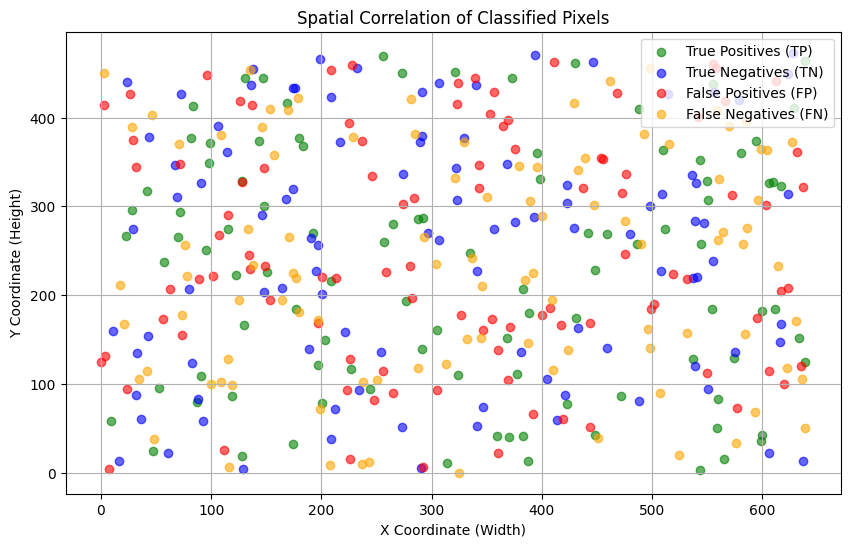

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example pixel locations for TP, TN, FP, FN
# You can replace this with your actual classified pixel positions
np.random.seed(0)  # For reproducibility
frame_height = 480
frame_width = 640
num_points = 100

# Randomly generate pixel locations
tp_x = np.random.randint(0, frame_width, size=num_points)  # X locations for TP
tp_y = np.random.randint(0, frame_height, size=num_points)  # Y locations for TP
tn_x = np.random.randint(0, frame_width, size=num_points)  # X locations for TN
tn_y = np.random.randint(0, frame_height, size=num_points)  # Y locations for TN
fp_x = np.random.randint(0, frame_width, size=num_points)  # X locations for FP
fp_y = np.random.randint(0, frame_height, size=num_points)  # Y locations for FP
fn_x = np.random.randint(0, frame_width, size=num_points)  # X locations for FN
fn_y = np.random.randint(0, frame_height, size=num_points)  # Y locations for FN

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot for True Positives (TP) - Green
plt.scatter(tp_x, tp_y, color='green', alpha=0.6, label="True Positives (TP)")

# Scatter plot for True Negatives (TN) - Blue
plt.scatter(tn_x, tn_y, color='blue', alpha=0.6, label="True Negatives (TN)")

# Scatter plot for False Positives (FP) - Red
plt.scatter(fp_x, fp_y, color='red', alpha=0.6, label="False Positives (FP)")

# Scatter plot for False Negatives (FN) - Orange
plt.scatter(fn_x, fn_y, color='orange', alpha=0.6, label="False Negatives (FN)")

# Add plot details
plt.title('Spatial Correlation of Classified Pixels')
plt.xlabel('X Coordinate (Width)')
plt.ylabel('Y Coordinate (Height)')
plt.legend(loc="upper right")
plt.grid(True)

# Show the plot
plt.show()


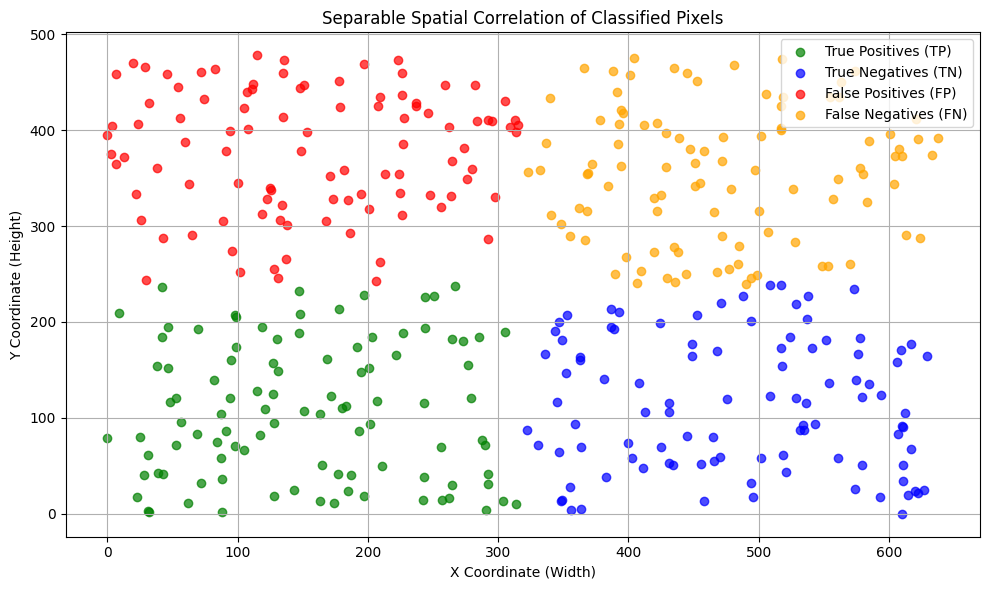

In [2]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Setting seed for reproducibility
np.random.seed(0)

# Frame dimensions
frame_height = 480
frame_width = 640
num_points = 100  # Number of points for each classification type

# Generate separable pixel locations for TP, TN, FP, FN
# We ensure the groups are separable by giving each group its own quadrant in the image
tp_x = np.random.randint(0, frame_width//2, size=num_points)  # X locations for TP (upper-left quadrant)
tp_y = np.random.randint(0, frame_height//2, size=num_points)  # Y locations for TP (upper-left quadrant)

tn_x = np.random.randint(frame_width//2, frame_width, size=num_points)  # X locations for TN (upper-right quadrant)
tn_y = np.random.randint(0, frame_height//2, size=num_points)  # Y locations for TN (upper-right quadrant)

fp_x = np.random.randint(0, frame_width//2, size=num_points)  # X locations for FP (lower-left quadrant)
fp_y = np.random.randint(frame_height//2, frame_height, size=num_points)  # Y locations for FP (lower-left quadrant)

fn_x = np.random.randint(frame_width//2, frame_width, size=num_points)  # X locations for FN (lower-right quadrant)
fn_y = np.random.randint(frame_height//2, frame_height, size=num_points)  # Y locations for FN (lower-right quadrant)

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot for True Positives (TP) - Green (upper-left quadrant)
plt.scatter(tp_x, tp_y, color='green', alpha=0.7, label="True Positives (TP)")

# Scatter plot for True Negatives (TN) - Blue (upper-right quadrant)
plt.scatter(tn_x, tn_y, color='blue', alpha=0.7, label="True Negatives (TN)")

# Scatter plot for False Positives (FP) - Red (lower-left quadrant)
plt.scatter(fp_x, fp_y, color='red', alpha=0.7, label="False Positives (FP)")

# Scatter plot for False Negatives (FN) - Orange (lower-right quadrant)
plt.scatter(fn_x, fn_y, color='orange', alpha=0.7, label="False Negatives (FN)")

# Add plot details
plt.title('Separable Spatial Correlation of Classified Pixels')
plt.xlabel('X Coordinate (Width)')
plt.ylabel('Y Coordinate (Height)')
plt.legend(loc="upper right")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
